In [ ]:
from flask import Flask, request
import numpy as np
import pickle
from flask import Flask, request, jsonify
from PIL import Image
import base64
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import keras.utils as image
from keras.models import load_model
import tensorflow

782/782 [==============================] - ETA: 0s - loss: 0.6290 - accuracy: 0.7754
Epoch 11/30
782/782 [==============================] - ETA: 0s - loss: 0.6004 - accuracy: 0.7860
Epoch 12/30
782/782 [==============================] - ETA: 0s - loss: 0.5821 - accuracy: 0.7941
Epoch 13/30
782/782 [==============================] - ETA: 0s - loss: 0.5556 - accuracy: 0.8023
Epoch 14/30
782/782 [==============================] - ETA: 0s - loss: 0.5424 - accuracy: 0.8060
Epoch 15/30
782/782 [==============================] - ETA: 0s - loss: 0.5231 - accuracy: 0.8147
Epoch 16/30
782/782 [==============================] - ETA: 0s - loss: 0.5048 - accuracy: 0.8207
Epoch 17/30
782/782 [==============================] - ETA: 0s - loss: 0.5004 - accuracy: 0.8219
Epoch 18/30
782/782 [==============================] - ETA: 0s - loss: 0.4788 - accuracy: 0.8299
Epoch 19/30
782/782 [==============================] - ETA: 0s - loss: 0.4676 - accuracy: 0.8342
Epoch 20/30
782/782 [=====================

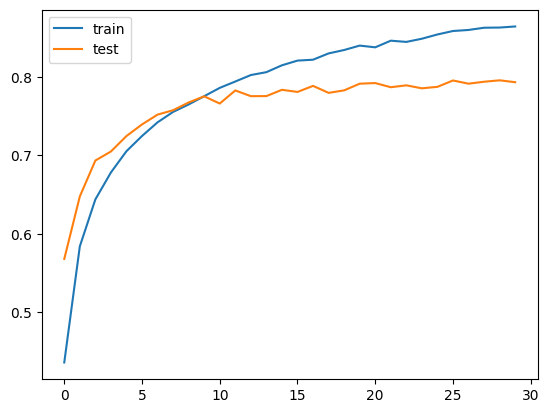

In [ ]:
# keras cifar10 training python

# As an AI language model, I cannot run Python code, but I can guide you through the process of training the CIFAR-10 dataset using Keras in Python. Here are the steps:

# 1. Import the necessary libraries:


import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical


# 2. Load the CIFAR-10 dataset:


(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# 3. Normalize the input data:


x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


# 4. Convert the target labels to one-hot encoded format:


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# 5. Define the CNN architecture:


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


# 6. Compile the model using appropriate optimizer, loss function and metrics:


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# 7. Train the model using the prepared training set and validation set:


history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_test, y_test), shuffle=True)

model.save('trained_model.h5')
# 8. Evaluate the trained model using the test set:


score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])


# 9. Visualize the model performance:


import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()


# These are the basic steps. You can further optimize the model by experimenting with different architectures, hyperparameters, and regularization techniques.

In [ ]:

def predict(filepath):
    img = Image.open(filepath)
    img = img.resize((32, 32))
    img = image.img_to_array(img)
    print(img.shape)
    img = img.reshape((1,) + img.shape)
    print(img.shape)
    model = keras.models.load_model('trained_model.h5')

    predictions = model.predict(img)
    max_index = int(np.argmax(predictions))

    data = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
    prediction = data[max_index]
    print("Class: ", prediction)
    output = np.array(prediction).tolist()
    #return output - this output is for Flask
    #if you need plain output just return or print prediction
    return jsonify(output)

In [ ]:
#res = predict("/home/jovyan/storage/cifar/0005.jpeg")
#print(res)

(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 0s 202ms/step
Class:  horse


RuntimeError: Working outside of application context.

This typically means that you attempted to use functionality that needed
the current application. To solve this, set up an application context
with app.app_context(). See the documentation for more information.